In [94]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
import warnings 
warnings.simplefilter("ignore")
import plotly.express as px
from datasist.structdata import detect_outliers

In [95]:
df=pd.read_csv('Ecommerce Customers.csv')

In [96]:
df.shape

(500, 8)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [98]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [99]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [100]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [101]:
df=df.drop(['Email', 'Address', 'Avatar'],axis=1)

In [102]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [103]:
df.drop_duplicates(inplace=True)

In [104]:
df.shape

(500, 5)

In [105]:
px.box(df, x="Avg. Session Length")

In [106]:
px.box(df, x="Time on App")

In [107]:
px.box(df, x="Time on Website")

In [108]:
px.box(df, x="Length of Membership")

In [109]:
px.box(df, x="Yearly Amount Spent")

In [110]:
indexs=detect_outliers(df,0,df.columns)

In [111]:
len(indexs)/df.shape[0]

0.048

In [112]:
df.drop(indexs,axis=0,inplace=True)

In [113]:
df.shape

(476, 5)

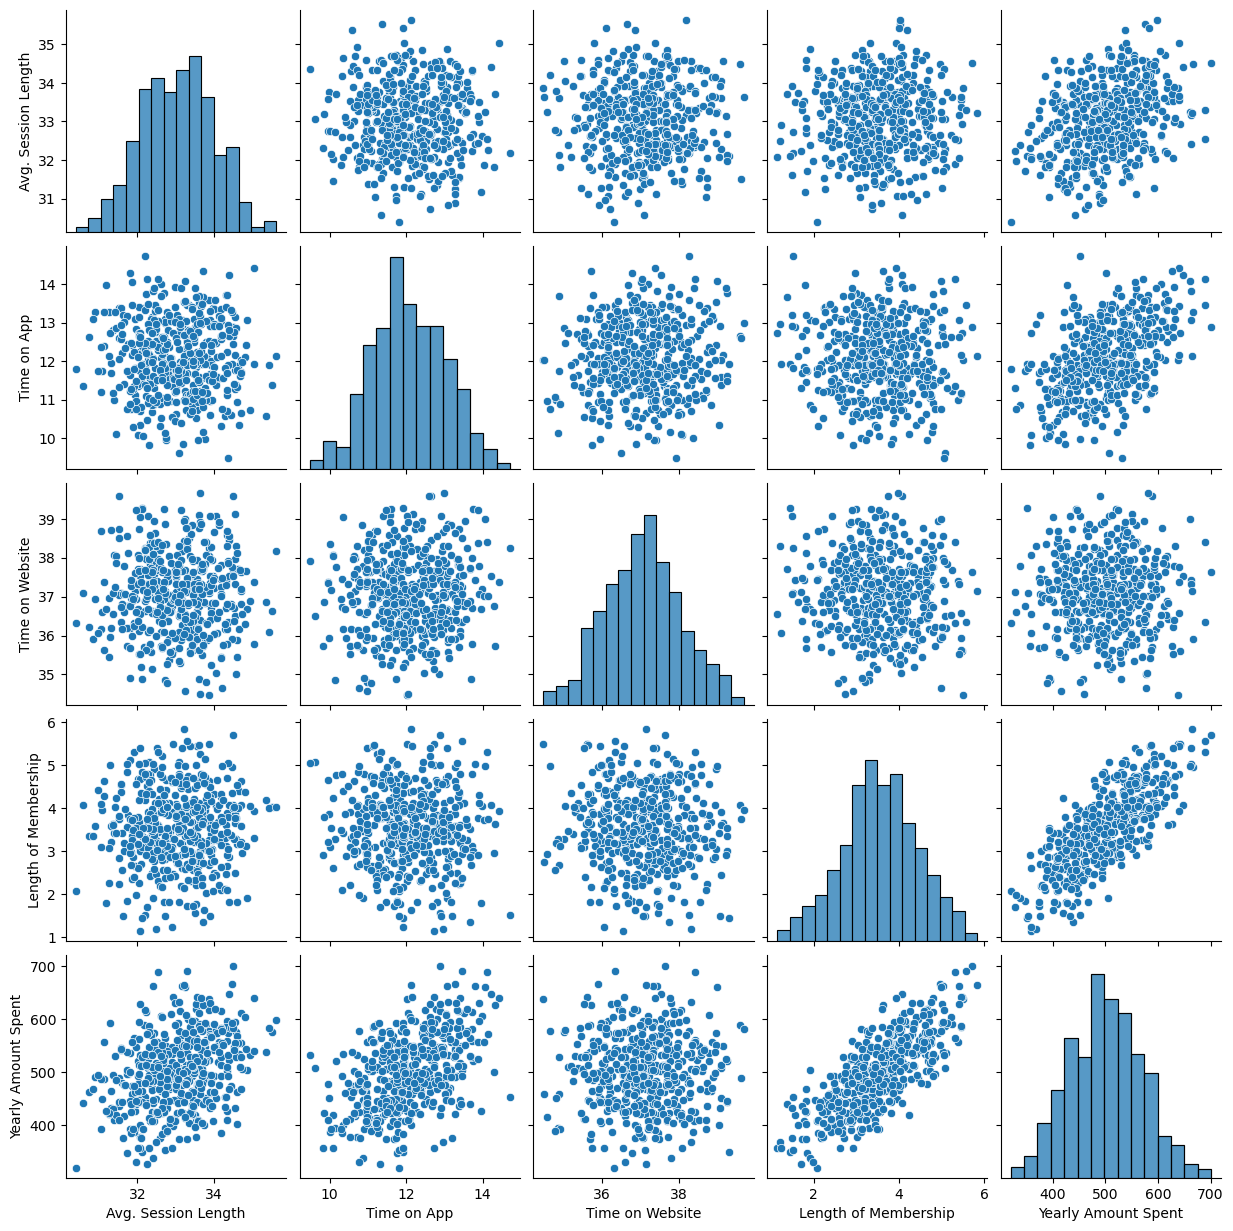

In [114]:
sns.pairplot(df)

In [82]:
x=df.drop('Yearly Amount Spent',axis=1)

In [83]:
y=df['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 476, dtype: float64

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
255,33.136655,13.891313,39.220713,2.907095
226,32.299647,12.168596,37.073616,4.403370
314,32.878474,13.032535,37.870952,4.693732
175,33.308572,11.691686,37.480912,1.715777
107,32.063775,10.719150,37.712509,3.004743
...,...,...,...,...
112,32.388452,11.010482,38.415042,3.543547
36,31.721652,11.755024,36.765722,1.847370
325,33.785207,13.039511,36.312727,2.018195
242,34.050947,11.388645,39.081565,2.436959


In [86]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [87]:
x_train

array([[ 0.1267269 ,  1.86701128,  2.18044244, -0.72578755],
       [-0.75243695,  0.04986916,  0.04119931,  0.96513911],
       [-0.14445722,  0.96116166,  0.8356187 ,  1.29327483],
       ...,
       [ 0.80794305,  0.96852008, -0.71690711, -1.73032571],
       [ 1.08706653, -0.77283329,  2.04180321, -1.25708404],
       [-0.97434388, -0.22517552, -1.83640132,  0.90457595]])

In [88]:
x_test

array([[-0.53126075, -1.19877545,  0.36289958,  2.08156191],
       [-0.31877791, -0.41859661,  0.12044382, -0.27222775],
       [-0.42720674, -1.67083362, -1.2969518 ,  0.41254142],
       [ 1.67032959, -0.37913616,  1.09025163, -1.95338759],
       [ 0.63025356, -0.19506866,  1.73002408,  0.11295601],
       [-0.60525658,  0.31940936,  1.90954903,  1.549338  ],
       [-0.58972979, -0.31468769, -0.08582475,  0.12165519],
       [ 0.32375987, -1.09355988, -0.25531173,  1.35346081],
       [-0.73120822,  0.31306234, -0.87372178, -0.36982492],
       [ 0.46037179, -1.16510612,  0.60283222,  0.66411743],
       [-0.09809791, -0.58352436, -0.12243791, -1.21776615],
       [-1.25769456, -0.94381713, -1.35734732,  0.23340475],
       [-0.78163591,  1.43843658,  0.51671781, -0.52322741],
       [ 0.7238147 , -2.06546875,  0.72810244,  1.38960556],
       [-0.82543525, -1.09379536,  0.9240264 ,  1.32751136],
       [ 0.23281872,  1.52403521, -0.6120339 ,  0.22289895],
       [ 0.38861955,  0.

In [89]:
model=LinearRegression()

In [90]:
#Training Step
model.fit(x_train,y_train)

LinearRegression()

In [91]:
y_predict=model.predict(x_test)

In [92]:
model.score(x_train,y_train)

0.9791939020163491

In [93]:
#Testing
model.score(x_test,y_test)

0.9800036065853741

In [118]:
features=list(x.columns)

In [122]:
#to allow anybody use the model 
joblib.dump(model,"model.h5")
joblib.dump(scaler,"scaler.h5")
joblib.dump(features,"features.h5")

['features.h5']

In [126]:
x.values[0]

array([34.49726773, 12.65565115, 39.57766802,  4.08262063])

In [136]:
#prediciton of random customer
pred=model.predict(scaler.transform([[44.49726773, 15.65565115, 43.57766802,  3.08262063]]))

In [137]:
pred[0]

914.116987065013